# MLP - Implementation Exercise.

## Using a Multilayer perpceptron to learn and classify 2d data.

## Overview  
An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can 
distinguish data that is not linearly separable.

The PyTorch machine learning library will be used in this exercise.

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import time
from torch.utils.data import TensorDataset, DataLoader
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

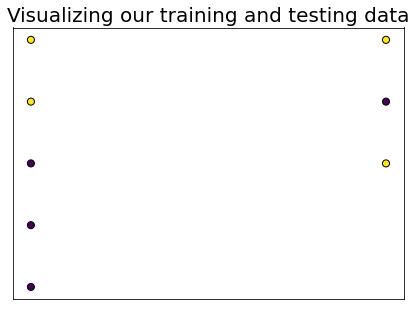

In [3]:
data = np.load('lab1_2.npz')
X = data['X']
Y = data['D']

plt.figure(0,figsize=(7,5))
plt.scatter(data['X'][:, 0], data['X'][:, 1],s=50, c=Y,zorder=10, cmap=plt.cm.viridis ,edgecolors='k')
plt.title("Visualizing our training and testing data",fontsize=20)
plt.xticks(())
plt.yticks(())
plt.show

In [4]:
class MLP(nn.Module):
    def __init__(self, n_in, n_out):    
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(n_in, 3) 
        self.fc2 = nn.Linear(3, 3) 
        self.fc3 = nn.Linear(3, n_out) 

    def forward(self, x):
        out = self.fc1(x)   
        out = torch.sigmoid(out)
        out = self.fc2(out)
        out = torch.sigmoid(out)                     
        out = self.fc3(out)  
        return out

In [5]:
X = torch.tensor(X)
Y = torch.tensor(Y)

train_dataset = TensorDataset(X, Y) # creation of our train_dataset
train_dataloader = DataLoader(train_dataset, batch_size=4) # creation of our train_dataloader - 4 samples will be stored

test_dataset = TensorDataset(X, Y)
test_dataloader = DataLoader(test_dataset, batch_size=8)

device = torch.device('cpu') # training will be done on our CPU

model = MLP(n_in=2, n_out=1)
model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)   
loss_fn = nn.MSELoss()


def do_epoch(model, device, train_dataloader, optimizer, loss_fn):
    model.train()  #model will randomly delete neurons on each layer, will prevent overfitting
    losses = []

    for batch_idx, (x, y) in enumerate(train_dataloader):
        x = x.to(device)
        y = y.to(device)

        logits = model(x) 
        probas = torch.sigmoid(logits)

        loss = loss_fn(probas, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
    return np.mean(losses)


def test_model(model, device, test_dataloader):
    model.eval()  #we get out of dropout mode
    correct = 0
    for _, (x, y) in enumerate(test_dataloader):

        x = x.to(device)
        y = y.to(device)

        logits = model(x)
        probas = torch.sigmoid(logits)
        
        predictions = (probas >= 0.5)
        correct += (predictions  == y).float().sum()
    acc = correct / len(test_dataloader.dataset)
    print('Test Epoch {} :\t Accuracy: {:.3f}'.format(epoch, acc))
    return acc


train_losses = []
test_accuracies = []
total_epochs = 10000

for epoch in range(total_epochs):
    mean_train_loss = do_epoch(model, device, train_dataloader, optimizer, loss_fn) 
    mean_test_acc = test_model(model, device, test_dataloader)
          
    train_losses.append(mean_train_loss)
    test_accuracies.append(mean_test_acc)


ccuracy: 0.875
Test Epoch 9429 :	 Accuracy: 0.875
Test Epoch 9430 :	 Accuracy: 0.875
Test Epoch 9431 :	 Accuracy: 0.875
Test Epoch 9432 :	 Accuracy: 0.875
Test Epoch 9433 :	 Accuracy: 0.875
Test Epoch 9434 :	 Accuracy: 0.875
Test Epoch 9435 :	 Accuracy: 0.875
Test Epoch 9436 :	 Accuracy: 0.875
Test Epoch 9437 :	 Accuracy: 0.875
Test Epoch 9438 :	 Accuracy: 0.875
Test Epoch 9439 :	 Accuracy: 0.875
Test Epoch 9440 :	 Accuracy: 0.875
Test Epoch 9441 :	 Accuracy: 0.875
Test Epoch 9442 :	 Accuracy: 0.875
Test Epoch 9443 :	 Accuracy: 0.875
Test Epoch 9444 :	 Accuracy: 0.875
Test Epoch 9445 :	 Accuracy: 0.875
Test Epoch 9446 :	 Accuracy: 0.875
Test Epoch 9447 :	 Accuracy: 0.875
Test Epoch 9448 :	 Accuracy: 0.875
Test Epoch 9449 :	 Accuracy: 0.875
Test Epoch 9450 :	 Accuracy: 0.875
Test Epoch 9451 :	 Accuracy: 0.875
Test Epoch 9452 :	 Accuracy: 0.875
Test Epoch 9453 :	 Accuracy: 0.875
Test Epoch 9454 :	 Accuracy: 0.875
Test Epoch 9455 :	 Accuracy: 0.875
Test Epoch 9456 :	 Accuracy: 0.875
Test 

# Results

## Plotting the accuracy and train loss over time.

<function matplotlib.pyplot.show(close=None, block=None)>

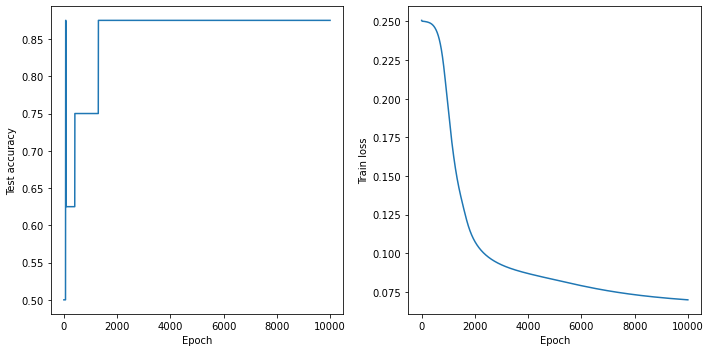

In [6]:
fig = plt.figure(figsize=(10., 5.))
ax1 = plt.subplot(121)
ax1.plot(test_accuracies)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Test accuracy")

ax2 = plt.subplot(122)
ax2.plot(train_losses)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Train loss")

plt.tight_layout()
plt.show